In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

data_path = "/content/drive/MyDrive/hand_gesture_dataset"
categories = sorted(os.listdir(data_path))  # No peace folder, only what's present
print("Detected classes:", categories)

X, y = [], []
for label, category in enumerate(categories):
    folder = os.path.join(data_path, category)
    for file in os.listdir(folder):
        img_path = os.path.join(folder, file)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, (64, 64))
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            img = img / 255.0
            X.append(img)
            y.append(label)

X = np.array(X).reshape(-1, 64, 64, 1)
y = to_categorical(y, num_classes=len(categories))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print("Total images loaded:", len(X))


Detected classes: ['fist', 'palm', 'thumbs_up']
Total images loaded: 94


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dense(len(categories), activation='softmax')  # Output adapts to 3 classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,624,963 (6.20 MB)

 Trainable params: 1,624,963 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
model.fit(X_train, y_train, epochs=15, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 319ms/step - accuracy: 0.4176 - loss: 1.0976 - val_accuracy: 0.5263 - val_loss: 0.9730
Epoch 2/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 142ms/step - accuracy: 0.6987 - loss: 0.9180 - val_accuracy: 0.7368 - val_loss: 0.8833
Epoch 3/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 149ms/step - accuracy: 0.8786 - loss: 0.6983 - val_accuracy: 0.5789 - val_loss: 0.6342
Epoch 4/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step - accuracy: 0.8251 - loss: 0.4855 - val_accuracy: 0.8421 - val_loss: 0.4771
Epoch 5/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 152ms/step - accuracy: 0.9209 - loss: 0.3412 - val_accuracy: 0.8421 - val_loss: 0.4163
Epoch 6/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 144ms/step - accuracy: 0.9182 - loss: 0.2003 - val_accuracy: 0.8421 - val_loss: 0.2978
Epoch 7/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 139ms/step - accuracy: 0.9276 - loss: 0.1843 - val_accuracy: 0.8421 - val_loss: 0.1544
Epoch 8/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - accuracy: 0.9026 - loss: 0.1924 - val_accuracy: 0.9474 - val_loss:

In [5]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
y_true = np.argmax(y_test, axis=1)
y_pred_classes = np.argmax(y_pred, axis=1)

print(classification_report(y_true, y_pred_classes, target_names=categories))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
              precision    recall  f1-score   support

        fist       1.00      1.00      1.00         3
        palm       1.00      0.88      0.93         8
   thumbs_up       0.89      1.00      0.94         8

    accuracy                           0.95        19
   macro avg       0.96      0.96      0.96        19
weighted avg       0.95      0.95      0.95        19



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


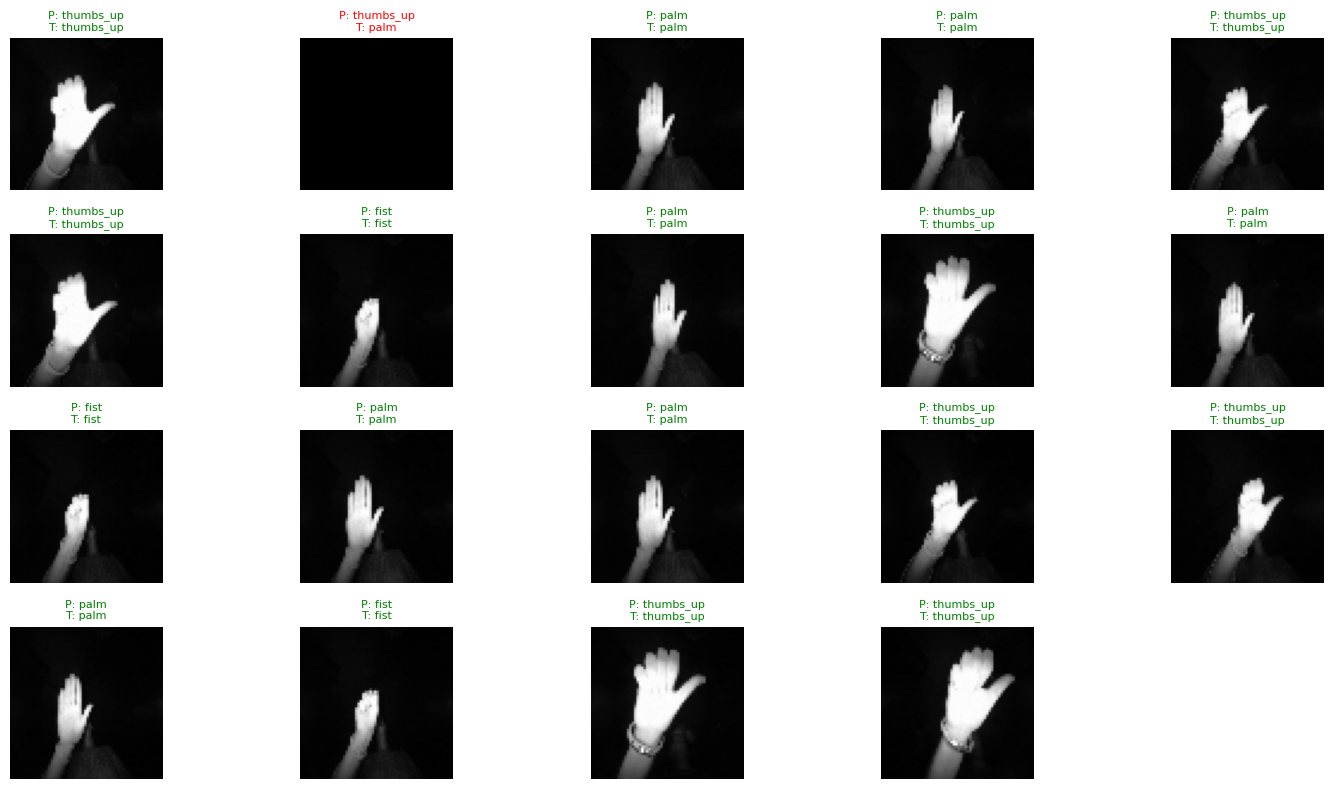

In [7]:
import matplotlib.pyplot as plt

# Number of images to show (you can increase this if needed)
num_images = len(X_test)

# Get predictions for the whole test set
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)

# Plot all test images with predicted labels
plt.figure(figsize=(15, num_images // 5 + 5))

for i in range(num_images):
    plt.subplot((num_images // 5) + 1, 5, i + 1)
    plt.imshow(X_test[i].reshape(64, 64), cmap='gray')
    plt.title(f"P: {categories[predicted_labels[i]]}\nT: {categories[true_labels[i]]}",
              fontsize=8, color='green' if predicted_labels[i] == true_labels[i] else 'red')
    plt.axis('off')

plt.tight_layout()
plt.show()
